In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# data into the pandas environment and identify some basic details

In [142]:
data=pd.read_csv('employee.csv')
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
data.shape

(9, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

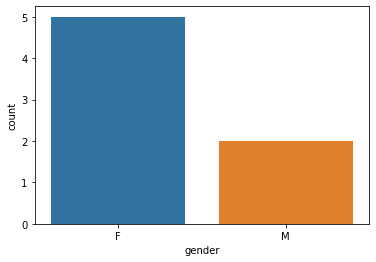

In [94]:
sns.countplot(x ='gender', data=data)

C:\Users\SEETHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Operations'), Text(1, 0, 'Finance'), Text(2, 0, 'Sales')])

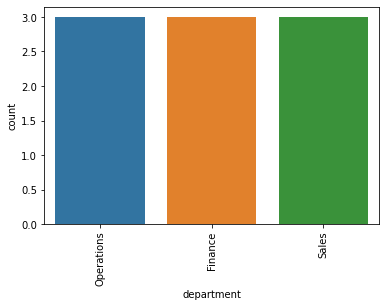

In [97]:
sns.countplot(data['department'])
plt.xticks(rotation=90)

C:\Users\SEETHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

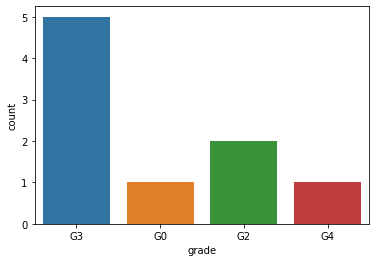

In [92]:
sns.countplot(data['grade'])

# Reset the index as "name".

In [107]:
data=pd.read_csv('employee.csv',index_col='name')
data.head(9)

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [12]:
data.set_index('name',inplace = True)
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# rows for specific names Jack Morgan and Josh wills

In [18]:
result = data.loc[["Jack Morgan","Josh Wills"]]
result 

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# data for multiple values "Sales" and “Finance

In [100]:
data.loc[data['department'].isin(['Sales','Finance'])]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# employee who has more than 700 performance score

In [30]:
data[data.performance_score>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# employee who has more than 500 and less than 700 performance score


In [29]:
data[data['performance_score'].between(500,700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# Check and handle missing values in the dataset.

In [32]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [31]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

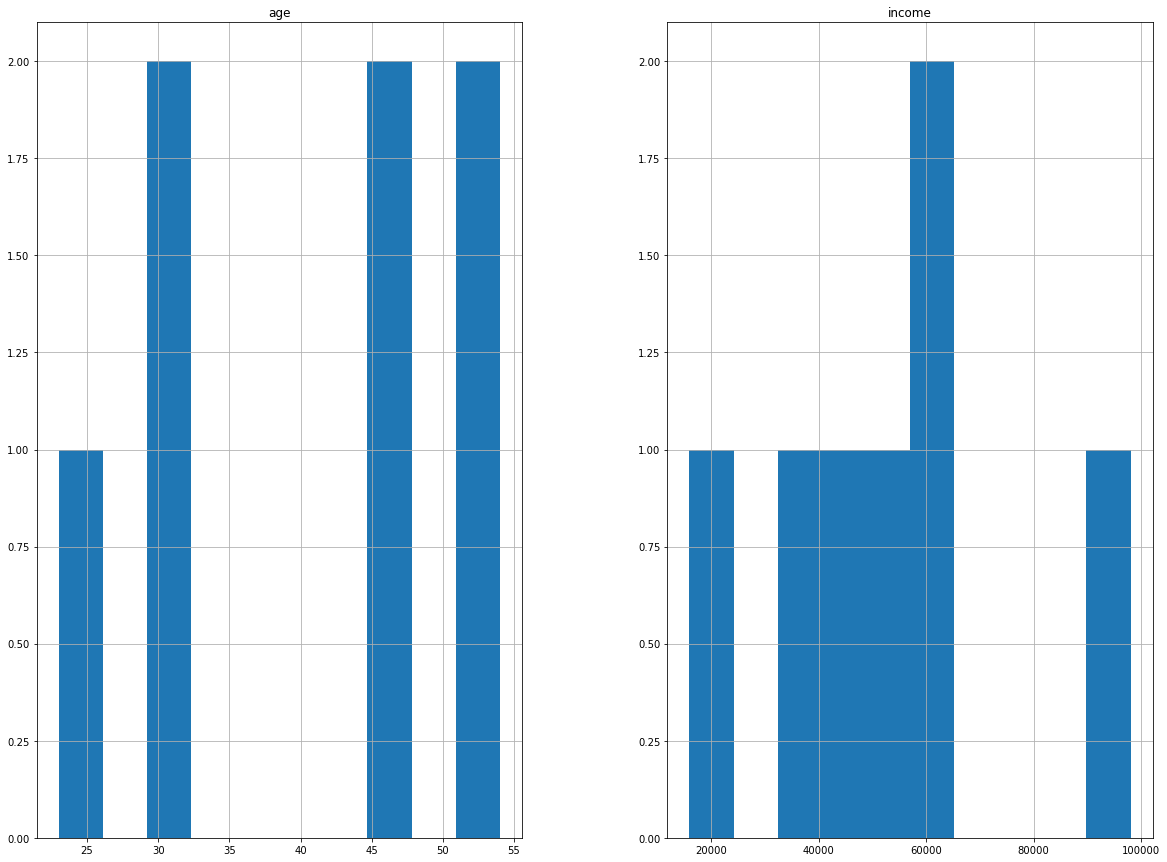

In [33]:
freqgraph = data.select_dtypes(include =['float'])
freqgraph.hist(figsize =(20,15))
plt.show()

In [159]:
for  i in ['age','income']:
    data[i] = data[i].fillna(data[i].median())

In [160]:
data=data.fillna({'gender':'M'},limit=2)
data.head(9)

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,M,Operations,G3,723
1,S Kumar,38.5,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,38.5,62000.0,M,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [161]:
data.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# Check the outliers and handle outliers in performance score using Percentiles

{'whiskers': [<matplotlib.lines.Line2D at 0x1f08ba5f220>,
 'caps': [<matplotlib.lines.Line2D at 0x1f08ba5f7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f08ba50f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f08ba5fd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f08ba6e070>],
 'means': []}

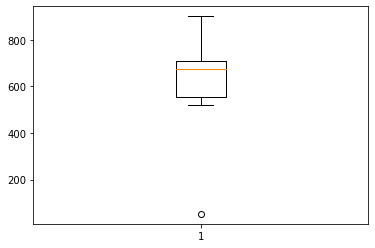

In [119]:
plt.boxplot(data['performance_score'])

In [110]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
Q1,Q2,Q3

(556.0, 674.0, 711.0)

In [111]:
data['performance_score'].median()

674.0

In [113]:
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
IQR ,lowlim, uplim

(155.0, 323.5, 943.5)

In [130]:
outlier = []
for x in data['performance_score']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
outlier

[53]

In [143]:
data[data.performance_score<100]

,name,age,income,gender,department,grade,performance_score
6,James Authur,54.0,NaN,F,Operations,G3,53


In [144]:
data.drop([6],inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f08bd26e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1f08bd32460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f08bd26bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f08bd32a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f08bd32d00>],
 'means': []}

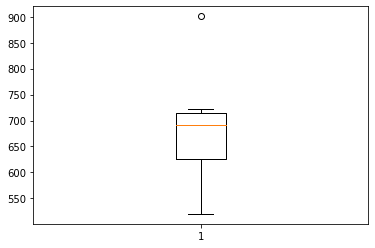

In [145]:
plt.boxplot(data['performance_score'])

# Check the gender column and do Dummy encoding

In [166]:
data=pd.get_dummies(data,columns=['gender'])
data

,name,age,income,department,grade,performance_score,gender_F,gender_M
0,Allen Smith,45.0,52000.0,Operations,G3,723,0,1
1,S Kumar,38.5,16000.0,Finance,G0,520,1,0
2,Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
3,Ying Chin,45.0,65000.0,Sales,G3,556,1,0
4,Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
5,Satyam Sharma,38.5,62000.0,Sales,G3,649,0,1
7,Josh Wills,54.0,52000.0,Finance,G3,901,1,0
8,Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# Do the standard scaling on the feature performance score.

In [167]:
y=data['performance_score']
x=data.drop(['performance_score','name','department','grade'], axis=1)

In [168]:
x.describe()

,age,income,gender_F,gender_M
count,8.000000,8.000000,8.000000,8.000000
mean,38.250000,52750.000000,0.500000,0.500000
std,9.848858,24099.496142,0.534522,0.534522
min,23.000000,16000.000000,0.000000,0.000000
25%,31.500000,40250.000000,0.000000,0.000000
50%,38.500000,52000.000000,0.500000,0.500000
75%,45.000000,62750.000000,1.000000,1.000000
max,54.000000,98000.000000,1.000000,1.000000


In [169]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
x = standardisation.fit_transform(x)
 

In [170]:
x=pd.DataFrame(x)

In [171]:
x.describe()

,0,1,2,3
count,8.000000,8.000000,8.000000,8.000000
mean,0.000000,0.000000,0.000000,0.000000
std,1.069045,1.069045,1.069045,1.069045
min,-1.655312,-1.630217,-1.000000,-1.000000
25%,-0.732679,-0.554495,-1.000000,-1.000000
50%,0.027136,-0.033270,0.000000,0.000000
75%,0.732679,0.443596,1.000000,1.000000
max,1.709585,2.007274,1.000000,1.000000


In [173]:
data.head(9)

,name,age,income,department,grade,performance_score,gender_F,gender_M
0,Allen Smith,45.0,52000.0,Operations,G3,723,0,1
1,S Kumar,38.5,16000.0,Finance,G0,520,1,0
2,Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
3,Ying Chin,45.0,65000.0,Sales,G3,556,1,0
4,Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
5,Satyam Sharma,38.5,62000.0,Sales,G3,649,0,1
7,Josh Wills,54.0,52000.0,Finance,G3,901,1,0
8,Leo Duck,23.0,98000.0,Sales,G4,709,0,1
